QISHA_PlotROICounts.ipynb
Created by JFranco, 10 SEP 2023

This is the fifth module in the QISHA pipepline. It is meant for plotting the results of a single experiment (i.e., not intended for batch analysis). The code will read in all puncta counts from a single ROI directory and plot the results. 

In [67]:
#                           *** LIBRARIES ***
import datetime
import numpy as np
import os
import matplotlib.image
import matplotlib.pyplot as plt
from cellpose import models , plot
import imageio
import pandas as pd
import seaborn as sns

In [68]:
#                   *** GET TIME OF ANALYSIS START ***
# could turn this into a module?
toa = str(datetime.datetime.today()).split()                                   #Time of analysis
today = toa[0]
now = toa[1]
timestamp = today.replace('-','')+'-'+now.replace(':','')[:6]

In [69]:
#                   *** WHERE TO GET/SAVE DATA ***   
# Directories 
#   UPDATE THIS INFO TO REFLECT YOUR SYSTEM
dirMain = "/Users/joyfranco/Dropbox (Partners HealthCare)/JF_Shared/Data/CYS/CYS_003/"
dirPCs = dirMain+"ROIPuncta/PunctaCounts/"
dirMD = dirMain+"Metadata/"

#   ones that need to be made
dirAna = dirMain+"Analysis/"
dirTR = dirAna+"Plots."+timestamp+"/"

In [70]:
# Load the metadata
fnMD = "CYS_003.Metadata.Samples.csv"
dfMD = pd.read_csv(dirMD+fnMD)

In [71]:
print(dfMD)

  Slides  Column      Row  AnimalID             Genotype Sex      DOB  \
0    All       1  1 and 2      1103  Ntng1Cre+/-;Ai14+/-   F   3/5/23   
1    All       2  1 and 2       689  Ntng1Cre+/-;Ai14+/-   M  2/28/22   
2    All       3  1 and 2       530  Ntng1Cre+/-;Ai14+/-   M  11/2/21   

   SacDate  AgeAtSac CollectionPrep         SampleID  
0  4/11/23        37     WSS_006.08  CYS_003.S11.TS2  
1   3/6/23       371      WSS_005.E  CYS_003.S11.TS4  
2   5/1/23       545     WSS_007.01  CYS_003.S10.TS5  


In [72]:
# Create directory for storing ROIs and Masks
if not os.path.exists(dirAna):
    os.mkdir(dirAna)
if not os.path.exists(dirTR):
    os.mkdir(dirTR)

In [73]:
# Get list of Puncta Counts to plot  
os.chdir(dirPCs)
pcs = os.listdir()

In [74]:
# Iterate through the list and generate a dataframe of compiled data

# Initialize dataframe for storing pcs
dfAll = pd.DataFrame()

for pc in pcs:
    # Gather the metadata for this sample
    fnBase = pc.split(".PunctaCounts",1)[0]
    # Index of the sample in the metadata sheet
    inSamp = dfMD.index[dfMD['SampleID']==fnBase].tolist()[0]
    # Get sample specific details
    animalID = "AID"+str(dfMD.loc[inSamp]['AnimalID'])
    geno = dfMD.loc[inSamp]['Genotype']
    sex = dfMD.loc[inSamp]['Sex']
    age = str(dfMD.loc[inSamp]['AgeAtSac'])
    
    # Read in the puncta counts 
    dfPC = pd.read_csv(dirPCs+pc)

    # Add metadata
    dfPC["animalID"] = animalID
    dfPC["geno"] = geno
    dfPC["sex"] = sex
    dfPC["age"] = age

    # Append to main df
    dfAll = pd.concat([dfAll, dfPC])

In [75]:
print(dfAll)

          Count        ImageName  ROI_ID animalID                 geno sex  \
0      1      7  CYS_003.S11.TS2       1  AID1103  Ntng1Cre+/-;Ai14+/-   F   
1      2     10  CYS_003.S11.TS2       2  AID1103  Ntng1Cre+/-;Ai14+/-   F   
2      3      9  CYS_003.S11.TS2       3  AID1103  Ntng1Cre+/-;Ai14+/-   F   
3      4      6  CYS_003.S11.TS2       4  AID1103  Ntng1Cre+/-;Ai14+/-   F   
4      5      6  CYS_003.S11.TS2       5  AID1103  Ntng1Cre+/-;Ai14+/-   F   
..   ...    ...              ...     ...      ...                  ...  ..   
153  154      1  CYS_003.S10.TS5     154   AID530  Ntng1Cre+/-;Ai14+/-   M   
154  155      4  CYS_003.S10.TS5     155   AID530  Ntng1Cre+/-;Ai14+/-   M   
155  156      7  CYS_003.S10.TS5     156   AID530  Ntng1Cre+/-;Ai14+/-   M   
156  157      4  CYS_003.S10.TS5     157   AID530  Ntng1Cre+/-;Ai14+/-   M   
157  158      2  CYS_003.S10.TS5     158   AID530  Ntng1Cre+/-;Ai14+/-   M   

     age  
0     37  
1     37  
2     37  
3     37  
4     37

/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 400x600 with 0 Axes>

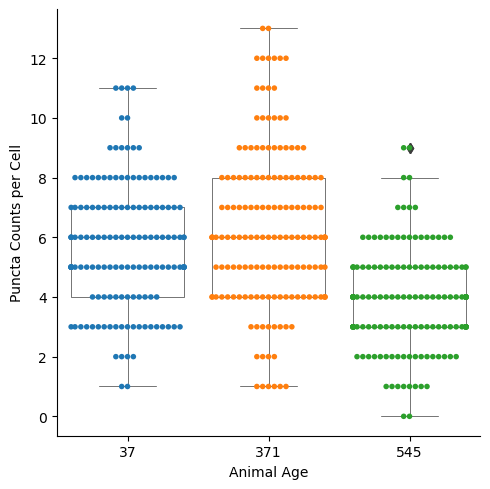

In [76]:
####### GENERATE PLOTS #######
# Plot Response Maximum Fold Change
order=["37","371","545"]
#colors = {"": "#882E72", '689': "#4EB265", '530': "#E8601C"}
plt.figure(figsize=(4, 6))
sns.catplot(x='age',y='Count', hue="animalID", 
            data=dfAll, kind="box",boxprops={'facecolor':'None'},linewidth=.5, 
            dodge=False, order=order, legend = False)
ax = sns.swarmplot(x='age', y='Count',hue="animalID", 
                   data=dfAll, 
                   dodge = False, size=4,  order=order, legend =False)
ax.set(xlabel='Animal Age', ylabel='Puncta Counts per Cell')
#ax.set(ylim=(0, 0.6))
#plt.xticks(rotation=45)
plt.savefig(dirTR+fnBase+".SwarmBoxPlot.png",  bbox_inches='tight', dpi = 300,
            format = "png")

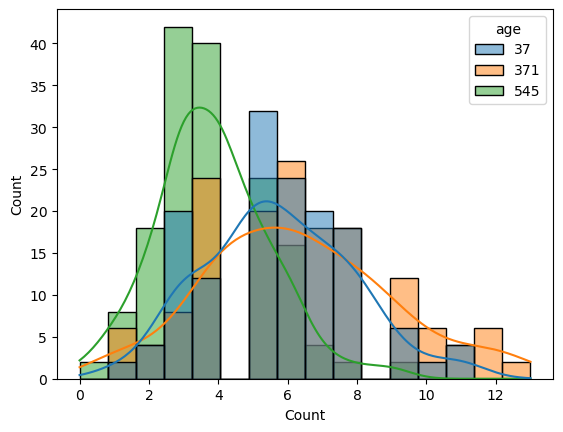

In [77]:
sns.histplot(data=dfAll, x='Count', hue='age',kde=True, hue_order=order)
plt.savefig(dirTR+fnBase+".HistKDE.png",  bbox_inches='tight', dpi = 300,
            format = "png")